<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/ML2_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**



In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#**Loading The Data**

In [251]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "creditcard.csv"

C_card = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path)

<ipython-input-251-71c1936db49a>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  C_card = kagglehub.load_dataset(


In [252]:
C_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [253]:
C_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 **Note**  :  ***V1 - V28***  are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

In [254]:
C_card.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#**Data preprocessing and feature engineering**

##preprocessing

In [255]:
C_card.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [256]:
C_card = C_card.drop(['Time'] , axis = 1)
#C_card = C_card.drop(['Amount'] , axis = 1)

In [257]:
x = C_card.drop(['Class'], axis=1)
y = C_card['Class']

In [258]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[["Amount"]] = scaler.fit_transform(x[['Amount']])

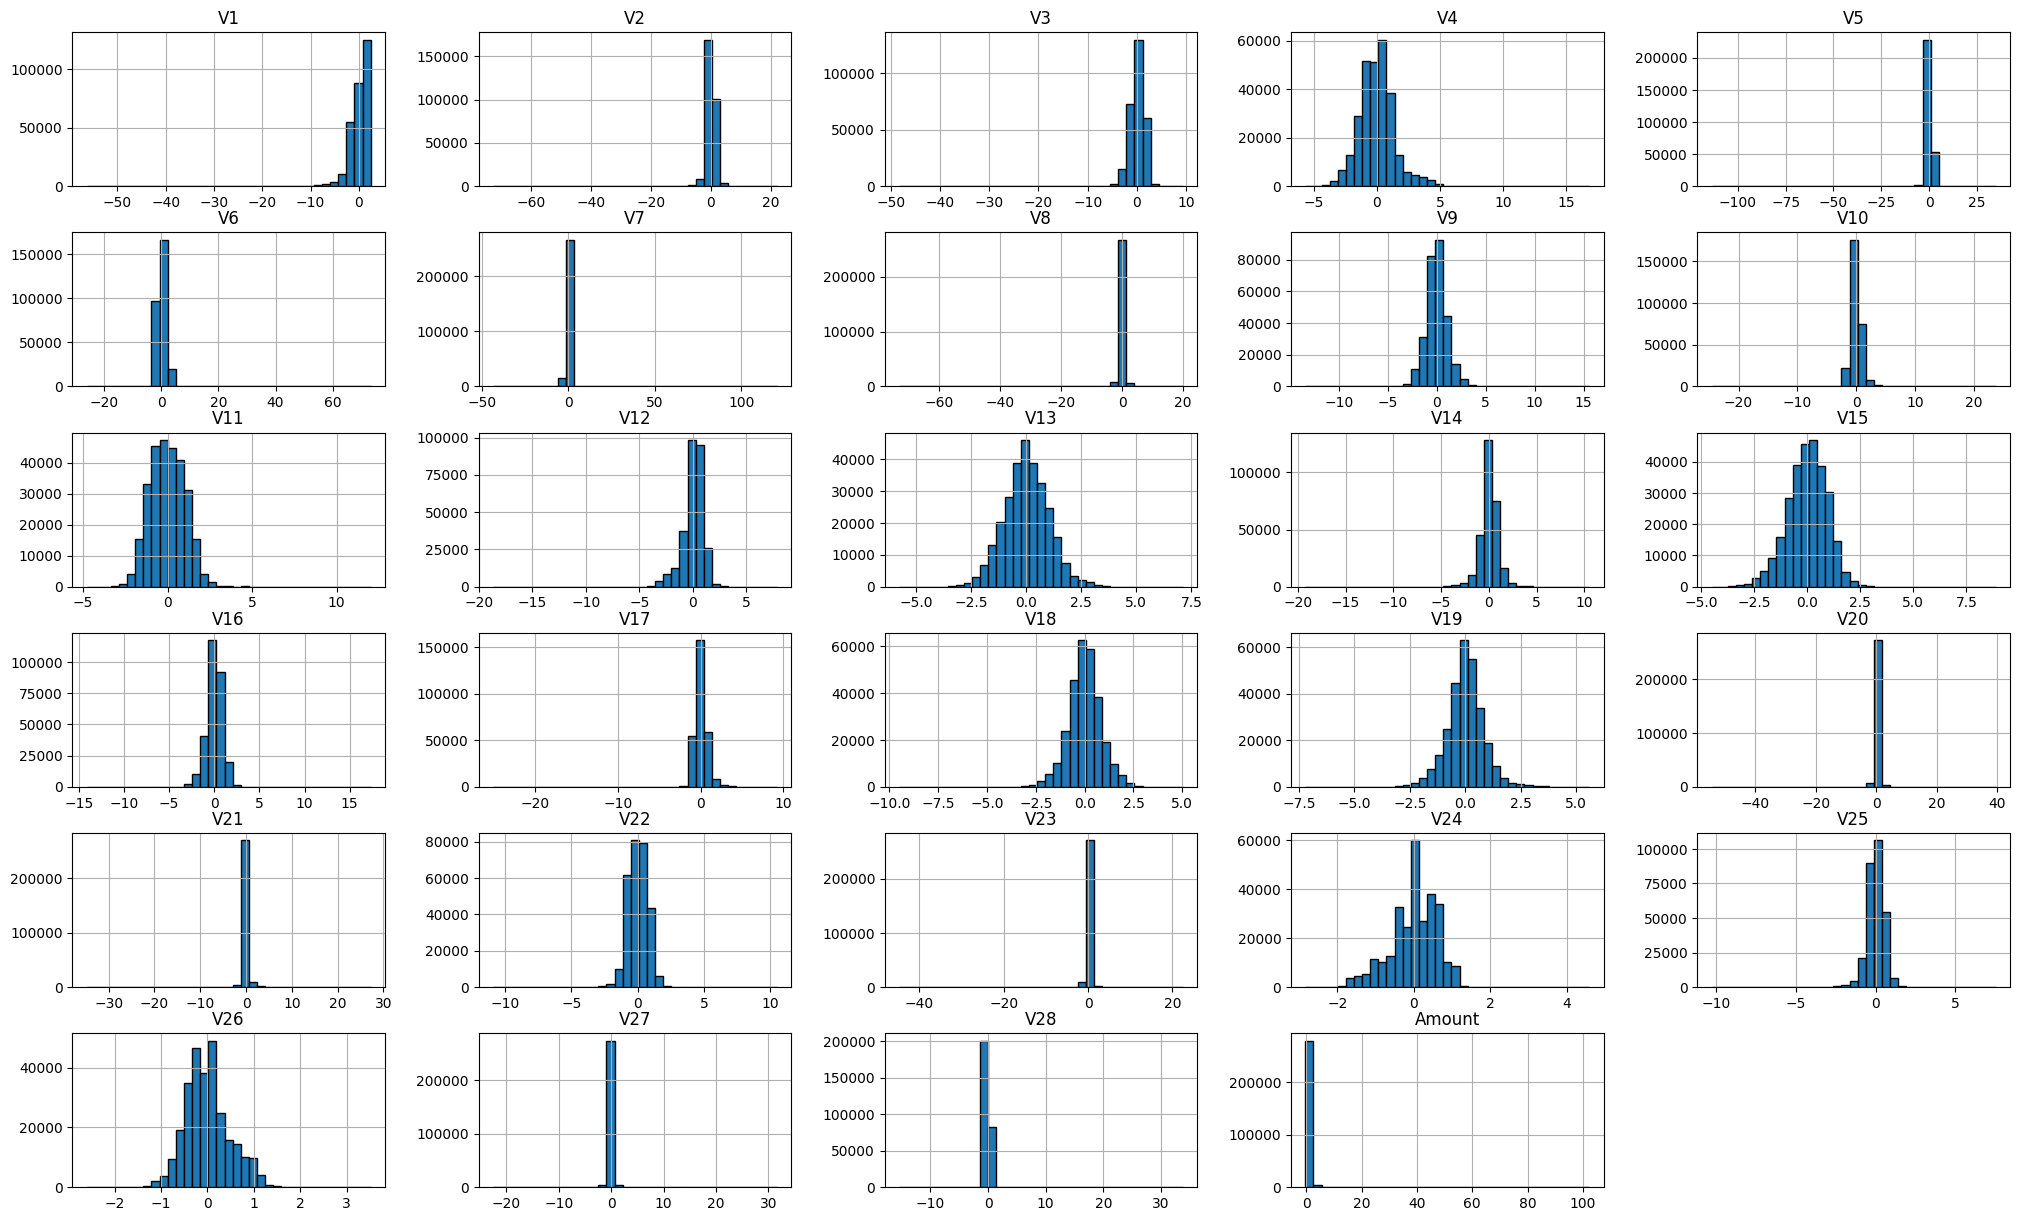

In [259]:
x.hist(figsize=(25, 15), bins=35, edgecolor='black')

plt.show()

In [260]:
# Left Skewed
# x[["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28"]]=np.sqrt(x[["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28"]])

# Right Skewed
# x[[ "V5", "V10", "V12", "V18", "V25","Amount"]]=np.sqrt(x[["V5", "V10", "V12", "V18", "V25","Amount"]])

cols = ["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28",
        "V5", "V10", "V12", "V18", "V25", "Amount"]

# for col in cols:
#     x[col] = np.cbrt(x[col])
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
x[cols] = pt.fit_transform(x[cols])

##**Highly imbalanced**

Class
0    284315
1       492
Name: count, dtype: int64


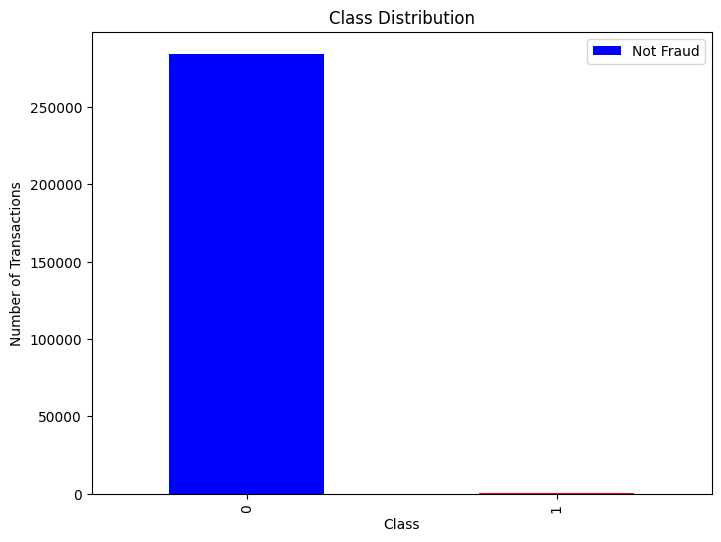

In [261]:
Label_counts = y.value_counts()
print(Label_counts)

plt.figure(figsize=(8, 6))
Label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(['Not Fraud' , 'Fraud'])
plt.show()

In [262]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)
x_balanced = pd.DataFrame(x_resampled, columns=x.columns)


Class
0    492
1    492
Name: count, dtype: int64


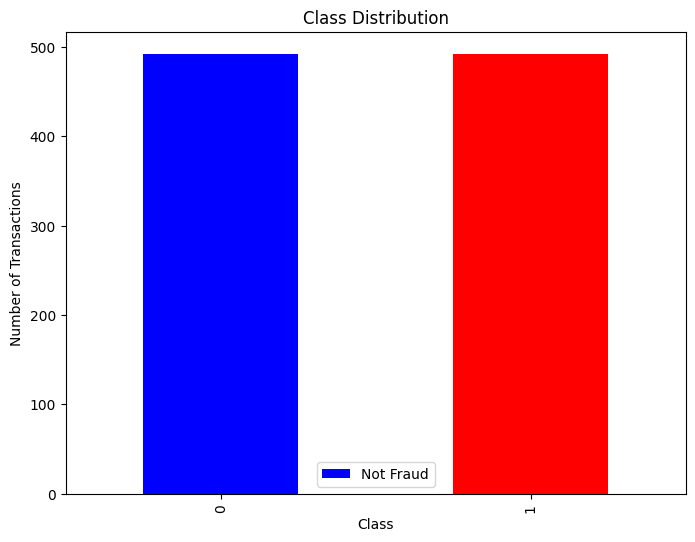

In [263]:
Balanced_Label_counts = y_resampled.value_counts()

print(Balanced_Label_counts)

plt.figure(figsize=(8, 6))
Balanced_Label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(['Not Fraud' , 'Fraud'])
plt.show()

In [264]:
x_balanced.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


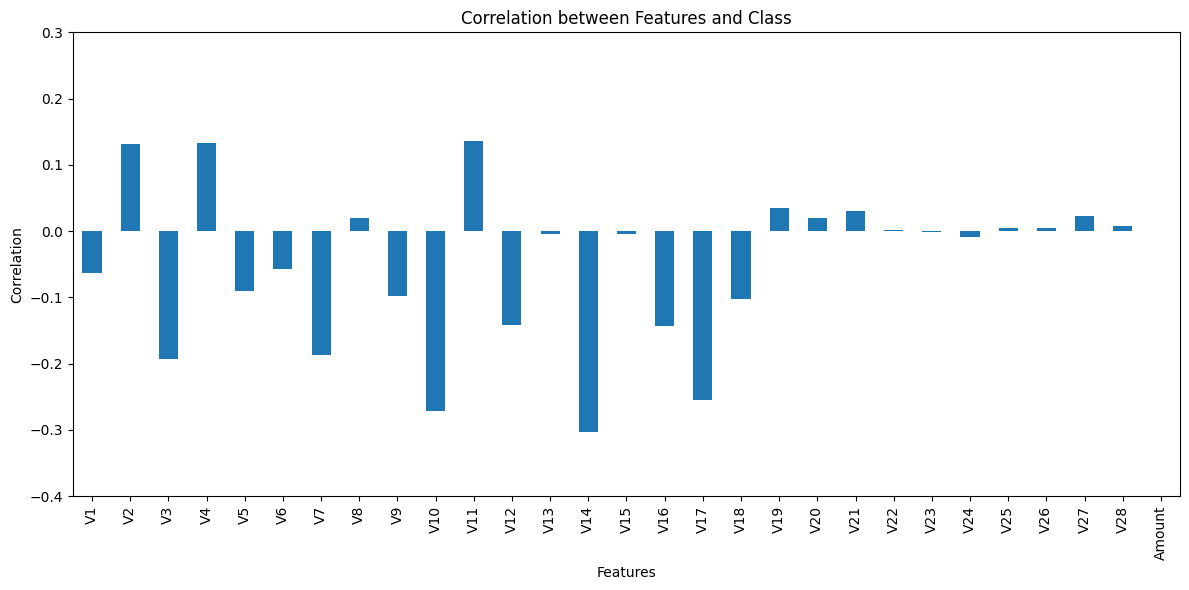

In [265]:
correlation_matrix = x.corrwith(y)
plt.figure(figsize=(12, 6))
correlation_matrix.plot(kind='bar')
plt.title('Correlation between Features and Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylim(-0.4, 0.3)
plt.tight_layout()
plt.show()

##**Feature Creation**

In [266]:
correlation_matrix=x_balanced.corr().round(6)

In [267]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(x_balanced, y_resampled)
importances = model.feature_importances_
importances_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df

,Feature,Importance
13,V14,0.169124
9,V10,0.122986
11,V12,0.105109
10,V11,0.103885
16,V17,0.086835
3,V4,0.080632
15,V16,0.059238
2,V3,0.054538
6,V7,0.028773
1,V2,0.021516


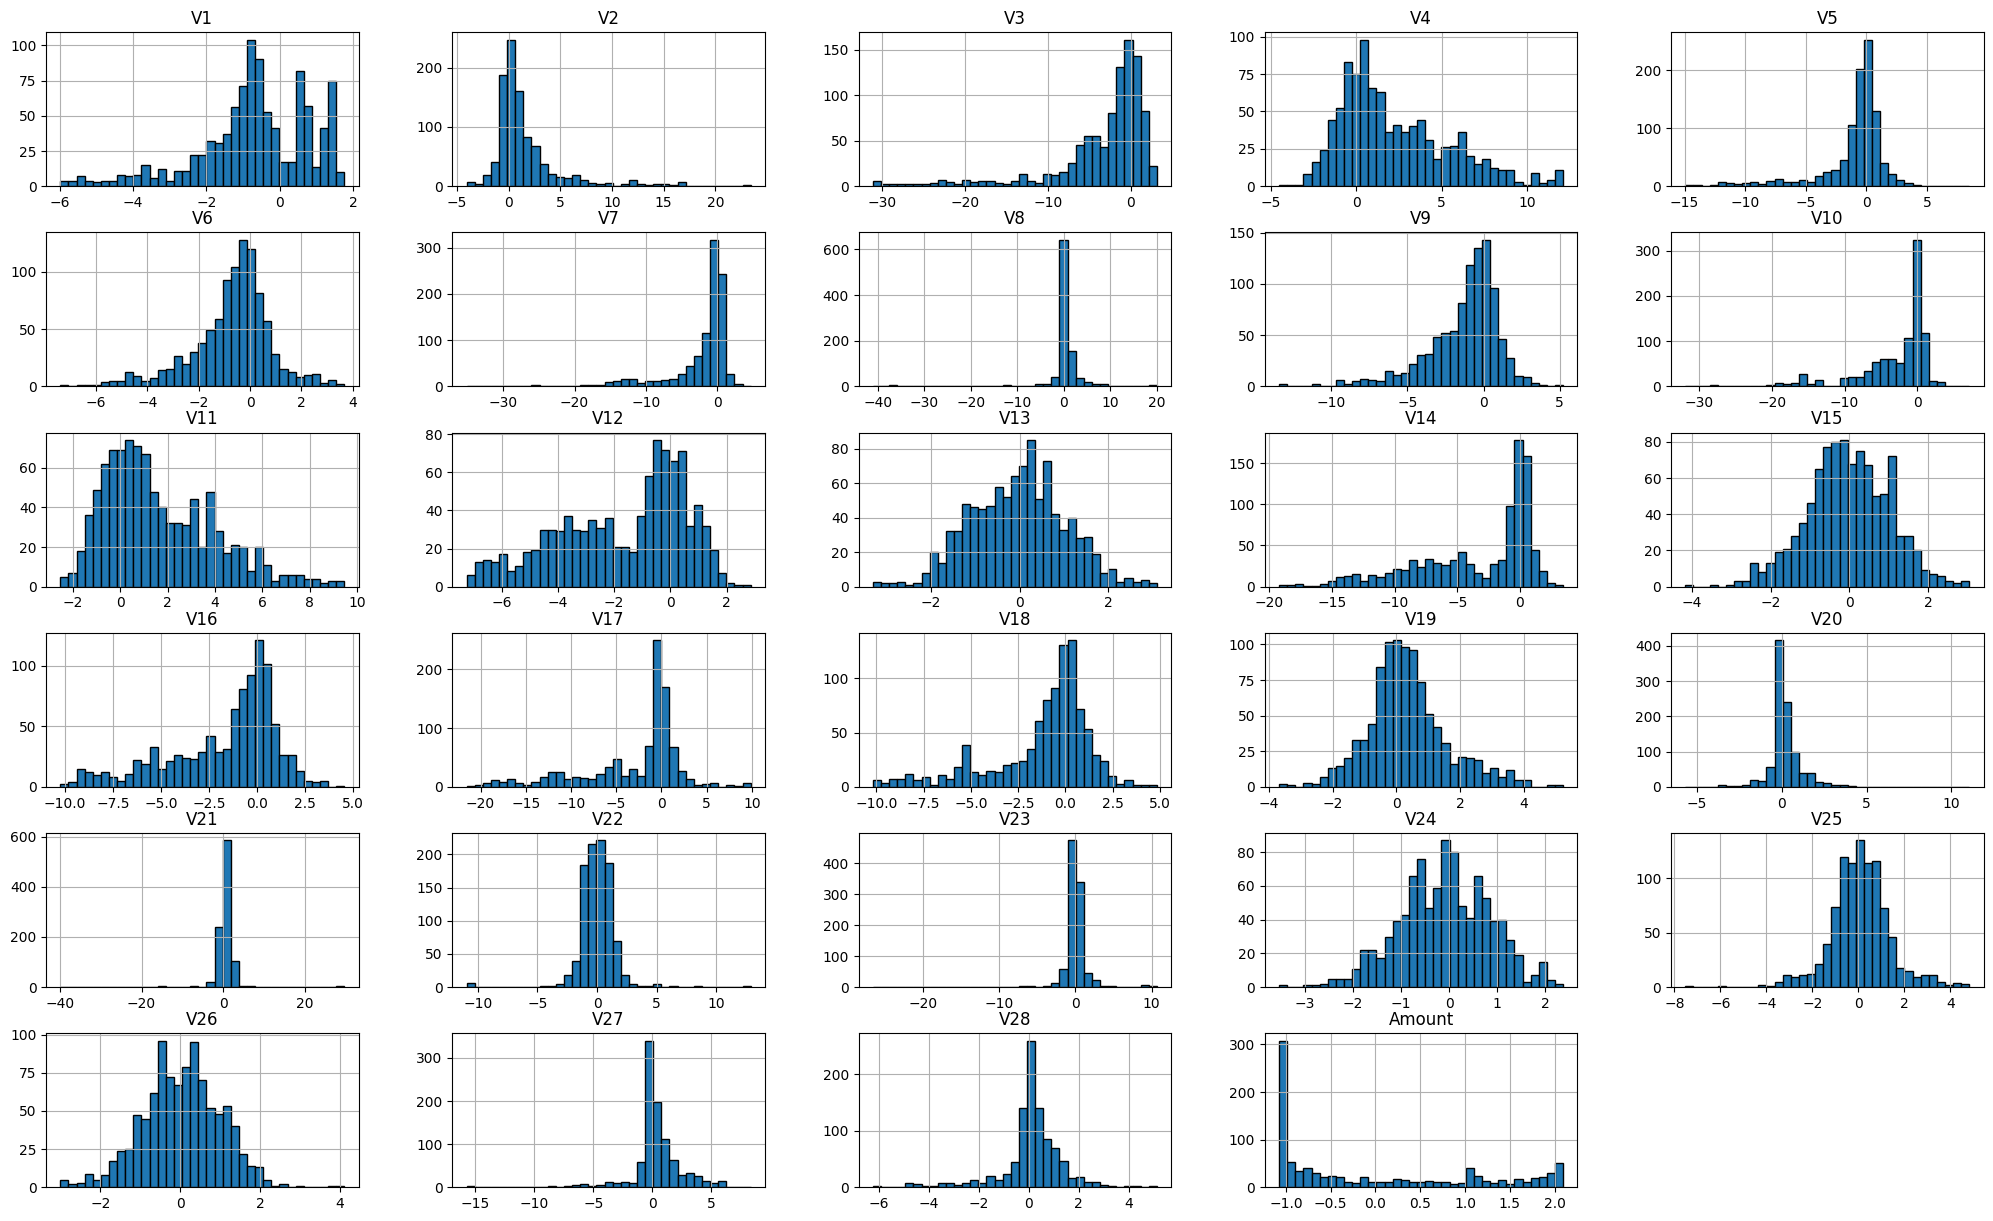

In [268]:
x_balanced.hist(figsize=(25, 15), bins=35, edgecolor='black')

plt.show()

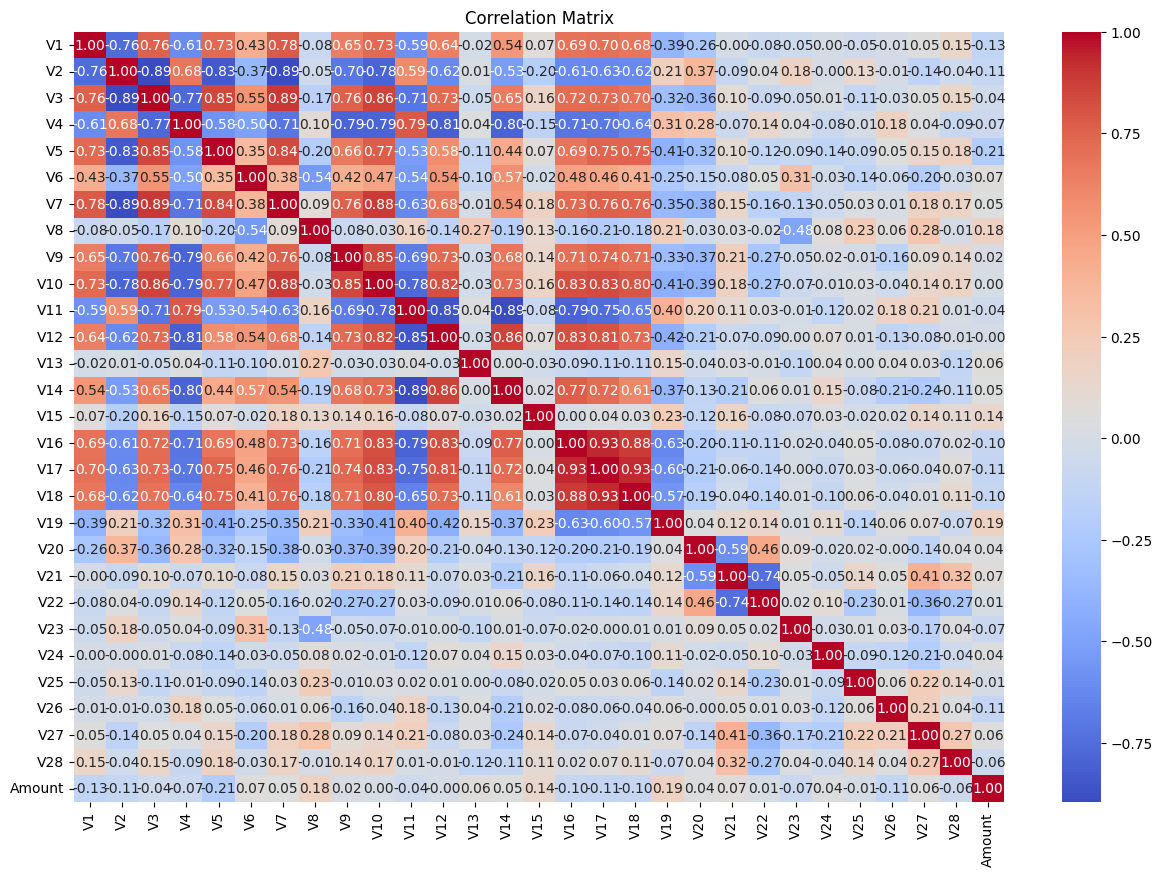

In [269]:


plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Dimensionality reduction (PCA, t-SNE)

In [270]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_balanced)

In [271]:
# Analyze explained variance

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.61282361, 0.11339653, 0.07690632, 0.04695285, 0.04212323,
       0.01414424, 0.01066533, 0.00935751, 0.00799089, 0.00679812,
       0.00579818, 0.00512996, 0.00448472, 0.00444723, 0.00388088,
       0.00369689, 0.00356127, 0.00325798, 0.00319345, 0.00285087,
       0.00275953, 0.00269719, 0.0025038 , 0.00230581, 0.00220796,
       0.00188861, 0.00172571, 0.00147191, 0.00097943])

 The first principal component explains the largest amount of variance, about 61.3%. This means most of the important information in the data is captured by the first component. The remaining components explain less variance, with the second and third contributing 11.3% and 7.7% respectively.

---




**explained variance**  --> It helps me determine how many principal components I need to retain in order to preserve most of the information from the original dataset, while reducing the dimensionality without significant loss of important data.



In [272]:
# #Analyze explained variance

# explained_variance = pca.explained_variance_ratio_
# cumulative_variance = np.cumsum(explained_variance)

# #print(cumulative_variance)

# per_var = np.round(pca.explained_variance_ratio_ * 100,decimals=1)
# labels = ['PC' + str(x_balanced) for x in range(1, len(per_var)+1)]

# plt.bar(x=range(1,len(per_var)+1) , height=per_var)
# plt.xlabel('Explained variance')
# plt.ylabel('Principal Component')
# plt.show()

In [273]:
# Choose the minimum number of components preserving 90–95% variance.
cumulative_var = np.cumsum(explained_variance)

n_components = np.argmax(cumulative_var >= 0.95) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

the minimum number of components preserving 90–95% variance: 12


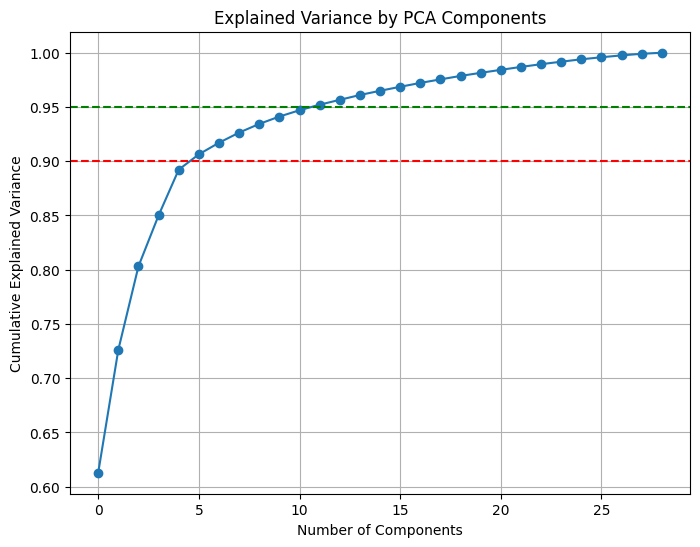

In [274]:

# cv = cumulative_variance
cv = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cv, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

To preserve 95% of the total variance in the dataset, 12 principal components are required. This indicates that the original high-dimensional data can be reduced to just 12 components while still retaining most of its essential information and structure.

---





In [275]:
pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(x_balanced)
x_pca_reduced.shape

(984, 12)

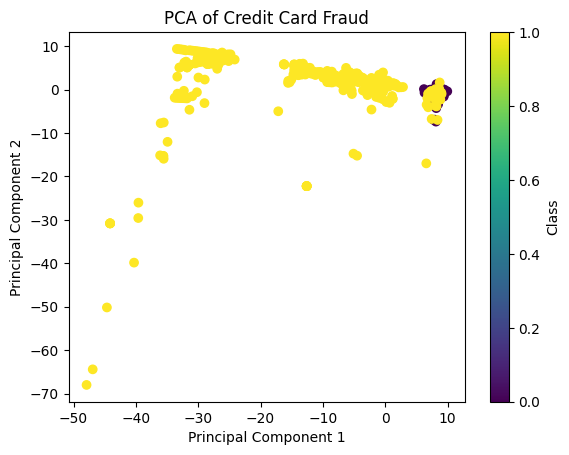

In [276]:
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y_resampled)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Credit Card Fraud')
plt.colorbar(label='Class')
plt.show()

##TSNE

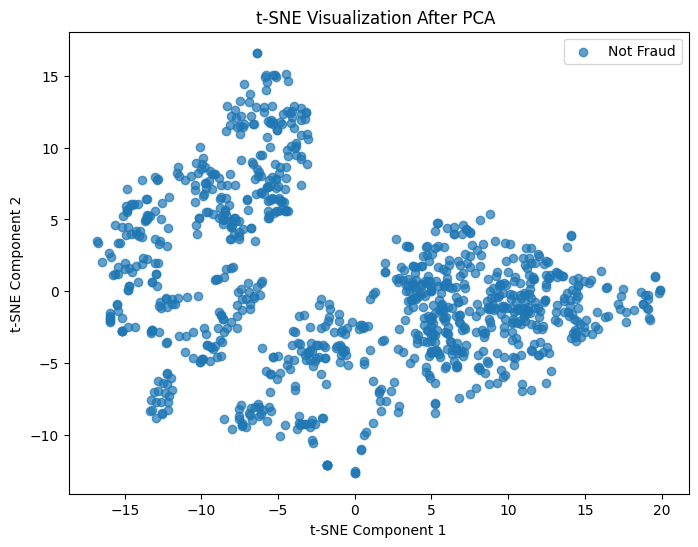

In [277]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(x_pca_reduced)


plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.7)
plt.title('t-SNE Visualization After PCA ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()


# Clustering

In [278]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

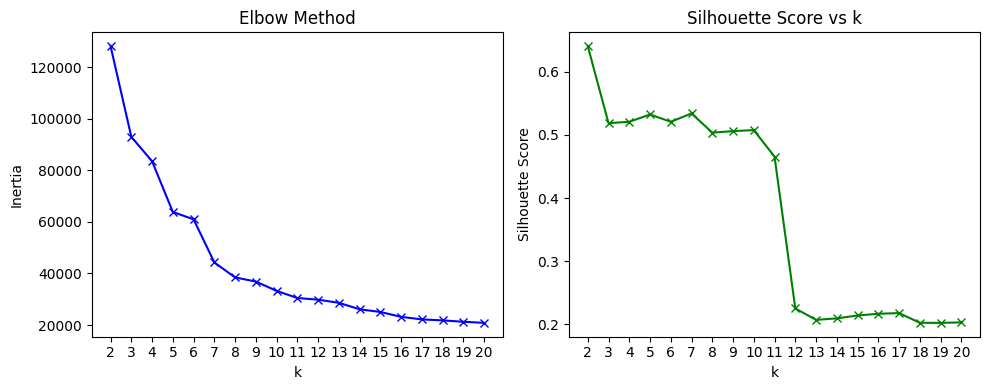

In [280]:
inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca_reduced)
    kmeans_per_k[k] = kmeans
    inertias.append(kmeans.inertia_)
    score = silhouette_score(x_pca_reduced, kmeans.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

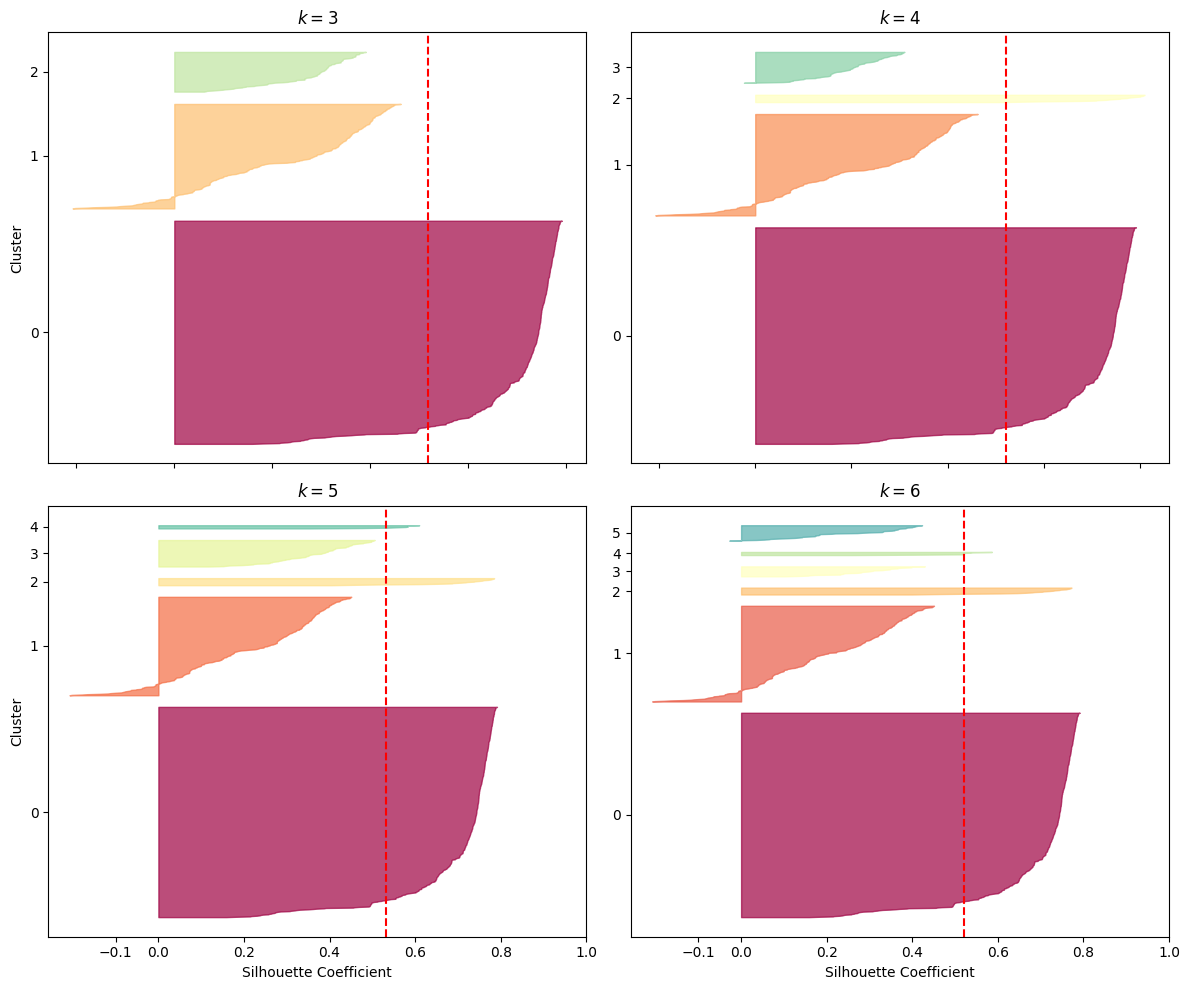

In [289]:
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(12, 10))

for i, k in enumerate(( 3, 4 , 5, 6 )):
    # Use i+1 for the subplot index to stay within the 2x2 grid
    plt.subplot(2, 2, i + 1)

    model = kmeans_per_k[k]
    y_pred = model.labels_
    silhouette_coefficients = silhouette_samples(x_pca_reduced, y_pred)

    padding = len(x_pca_reduced) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Use silhouette_scores[k-2] to access the correct score
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.tight_layout()
plt.show()

In [227]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(x_pca_reduced)

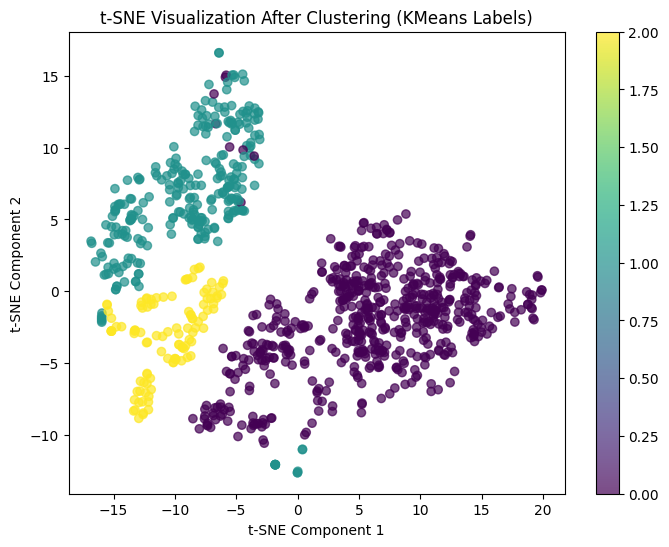

In [228]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization After Clustering (KMeans Labels)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()
